# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [138]:
source("load_libraries.R")

Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [139]:
source("functions.R")

## Data

In [140]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [141]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [142]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [143]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")

In [144]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])
to_comp = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)", "104w VS 8w (F)", "104w VS 8w (M)")

# Differentially expressed genes

In [145]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_52w, M_104w_52w, F_104w_8w, M_104w_8w)
names(age_gender_data) = to_comp
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age-effect/age_gender/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) >= 1.5),Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
52w VS 8w (F),2278,1265,1013,916,649,267
52w VS 8w (M),427,261,166,280,192,88
104w VS 52w (F),290,169,121,192,130,62
104w VS 52w (M),3872,1974,1898,1585,492,1093
104w VS 8w (F),1841,1074,767,956,713,243
104w VS 8w (M),3706,1925,1781,1828,730,1098


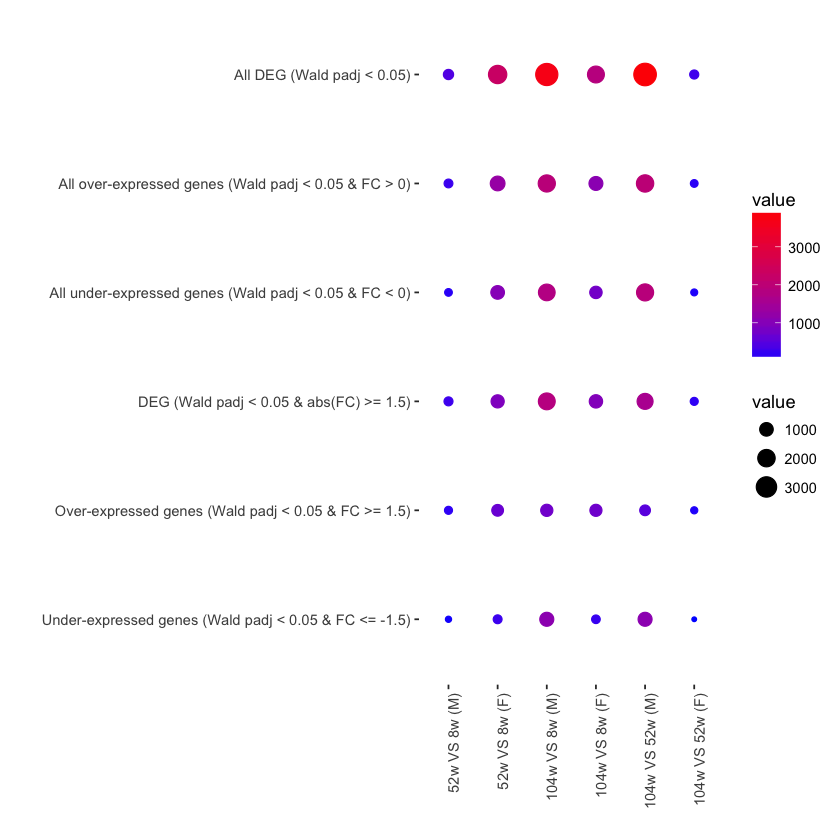

In [146]:
age_gender_deg$stat
plot_stat_mat(age_gender_deg$stat)

## All DEG (Wald padj < 0.05)

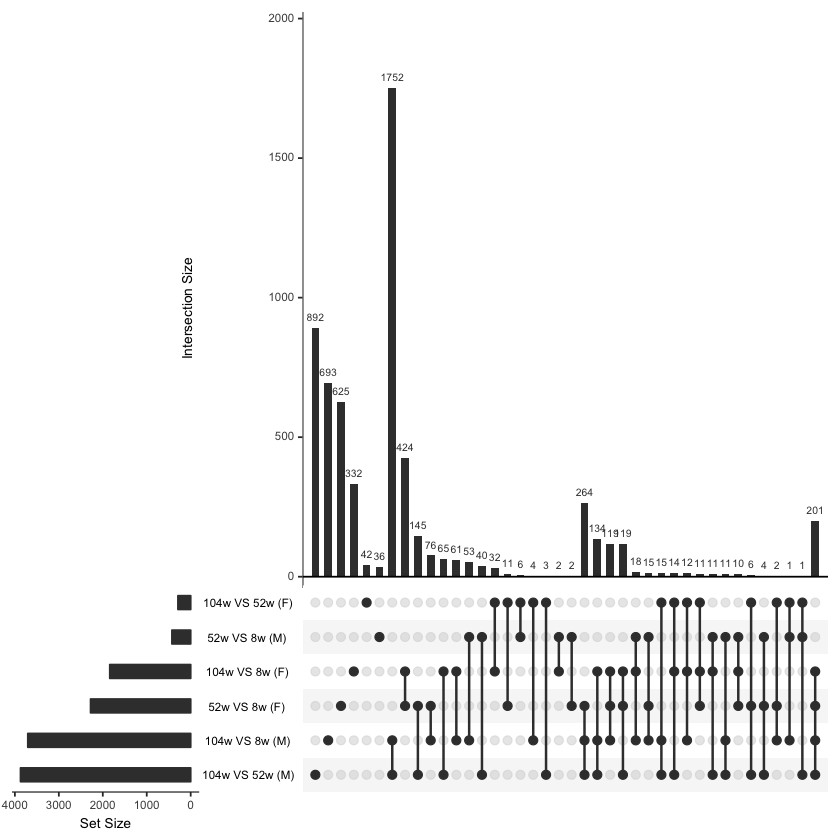

In [147]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../results/dge/age-effect/age_gender/gender_difference_aging_hist_explanation.png)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

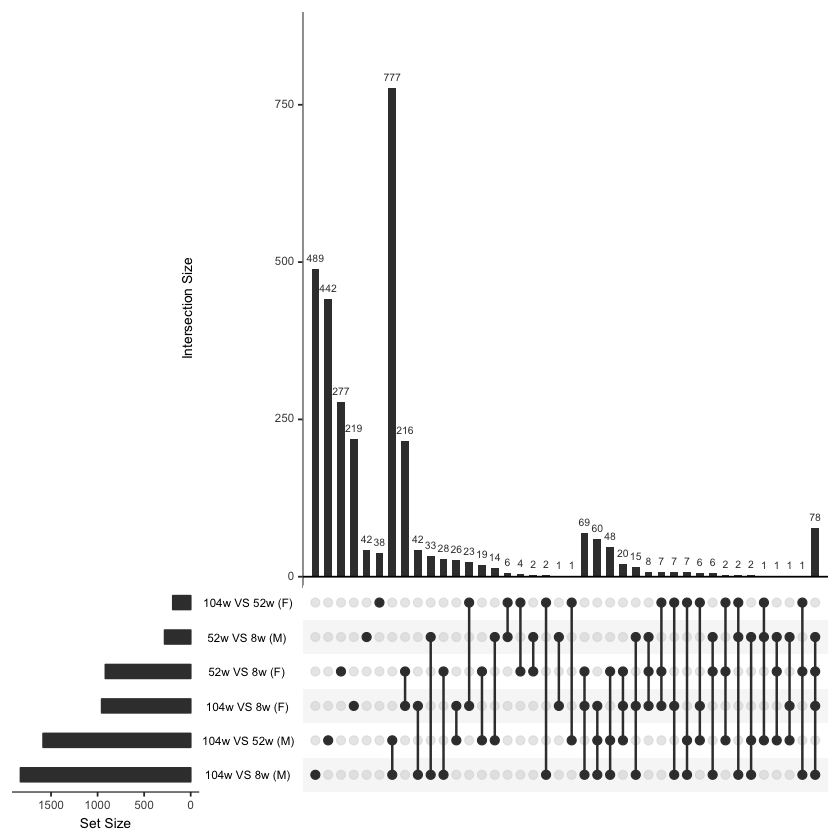

In [148]:
upset(as.data.frame(1*(!is.na(age_gender_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

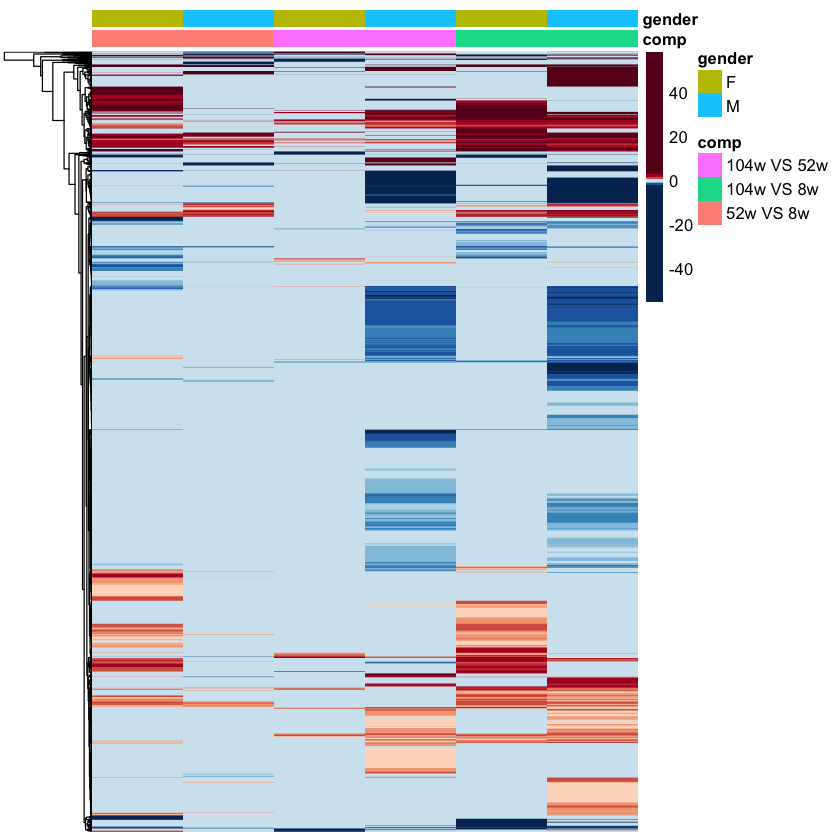

In [149]:
fc_annot = data.frame(comp = c(rep("52w VS 8w",2), rep("104w VS 52w",2),rep("104w VS 8w",2)),
              gender = rep(c("F","M"),3))
rownames(fc_annot) = colnames(age_gender_deg$sign_fc_deg)
plot_fc_heatmap(age_gender_deg$sign_fc_deg, fc_annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

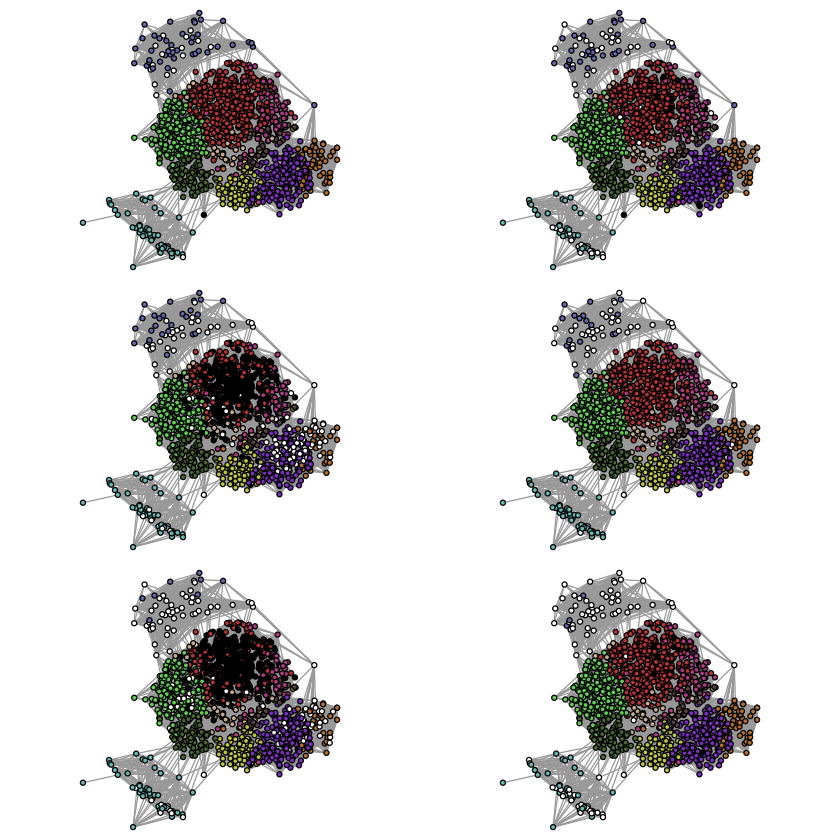

In [150]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
col_52w_vs_8w_F = get_deg_colors(age_gender_deg, "52w VS 8w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_F, pal2, layout, add_legend = FALSE)
col_52w_vs_8w_M = get_deg_colors(age_gender_deg, "52w VS 8w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_M, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_F = get_deg_colors(age_gender_deg, "104w VS 52w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_F, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_M = get_deg_colors(age_gender_deg, "104w VS 52w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_M, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_F = get_deg_colors(age_gender_deg, "104w VS 8w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_F, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_M = get_deg_colors(age_gender_deg, "104w VS 8w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_M, pal2, layout, add_legend = FALSE)

# GO analysis

In [151]:
full_go_desc = age_gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_gender_deg$GO_wall[[1]][,"category"]
comp = colnames(age_gender_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


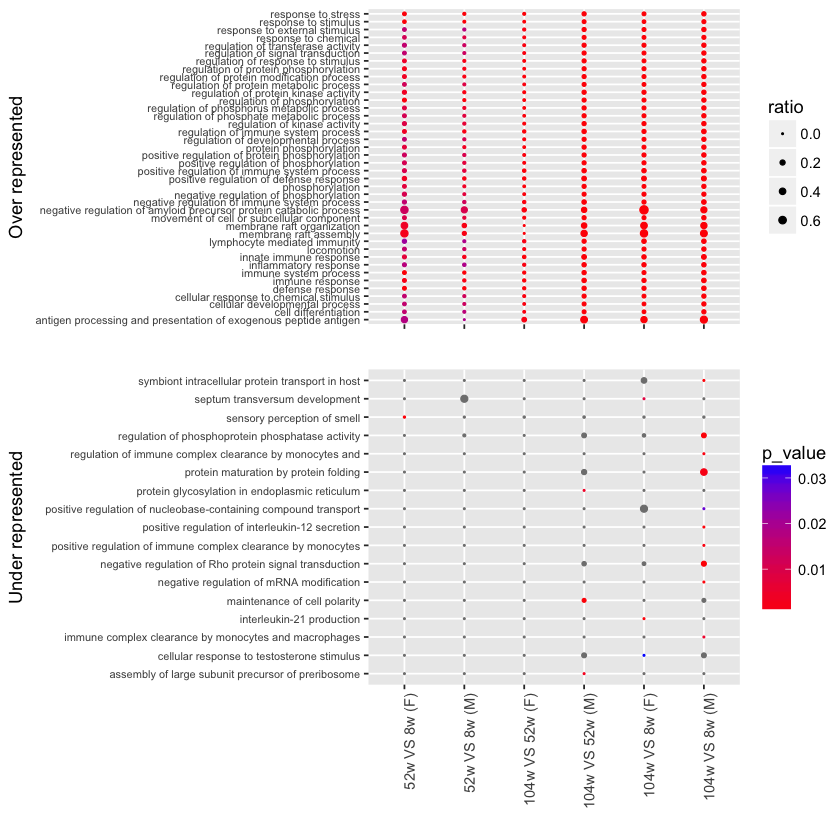

In [152]:
plot_top_go(age_gender_deg, "BP", 40)

Network based on description similarity

In [153]:
BP_network = create_GO_network(age_gender_deg, "BP", BP_GO)

Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

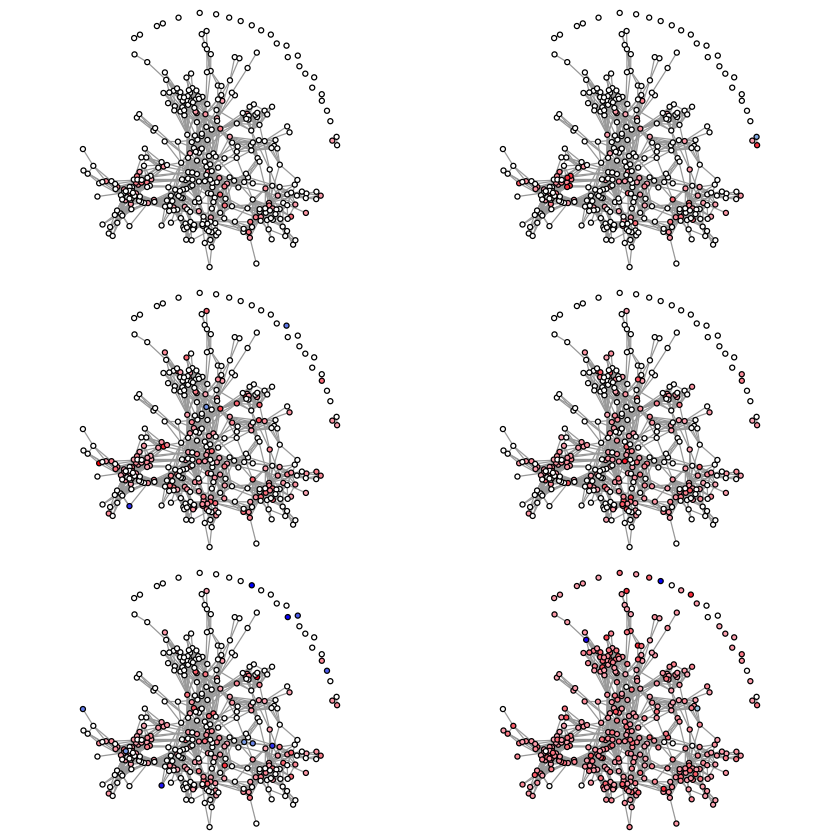

In [154]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)

### 52w VS 8w (F)

In [155]:
# 52w VS 8w (F)
#plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "52w VS 8w (F)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/52w_VS_8w_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/52w_VS_8w_F.png)

GO Tree at "../results/dge/age-effect/age_gender/go/52w_VS_8w_F.png"

### 52w VS 8w (M)

In [156]:
# 52w VS 8w (M)
# plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "52w VS 8w (M)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/52w_VS_8w_M",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/52w_VS_8w_M.png)

GO Tree at "../results/dge/age-effect/age_gender/go/52w_VS_8w_M.png"

### 104w VS 52w (F)

In [157]:
# 104w VS 52w (F)
# plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "104w VS 52w (F)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/104w_VS_52w_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/104w_VS_52w_F.png)

GO Tree at "../results/dge/age-effect/age_gender/go/104w_VS_52w_F.png"

### 104w VS 52w (M)

In [158]:
# 104w VS 52w (M)
# plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "104w VS 52w (M)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/104w_VS_52w_M",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/104w_VS_52w_M.png)

GO Tree at "../results/dge/age-effect/age_gender/go/104w_VS_52w_M.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


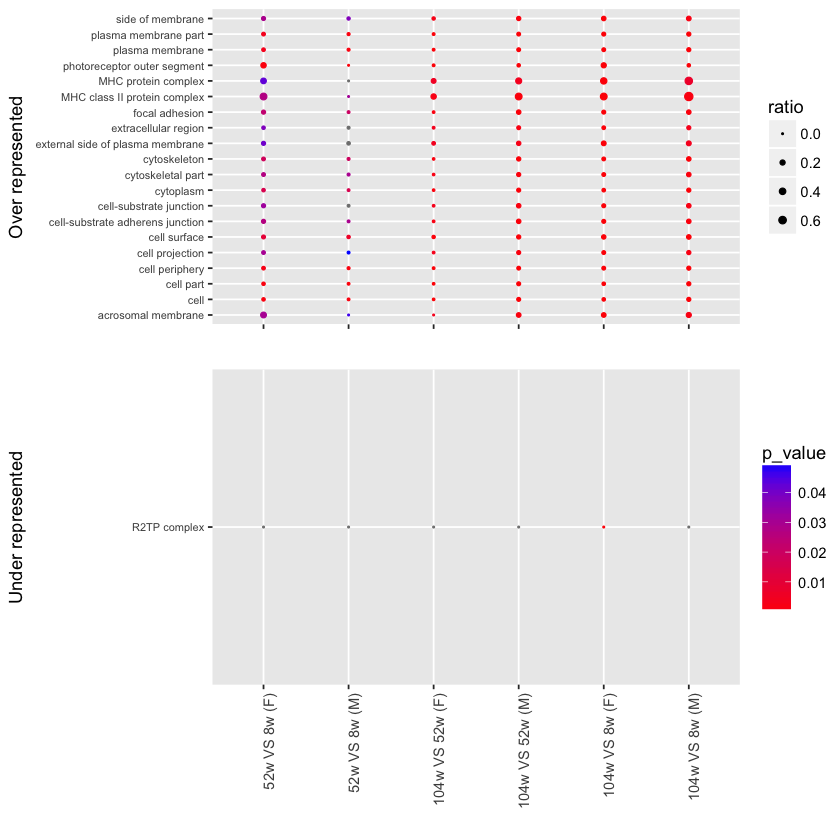

In [159]:
plot_top_go(age_gender_deg,
            "CC",
            20)

In [160]:
CC_network = create_GO_network(age_gender_deg, "CC", CC_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

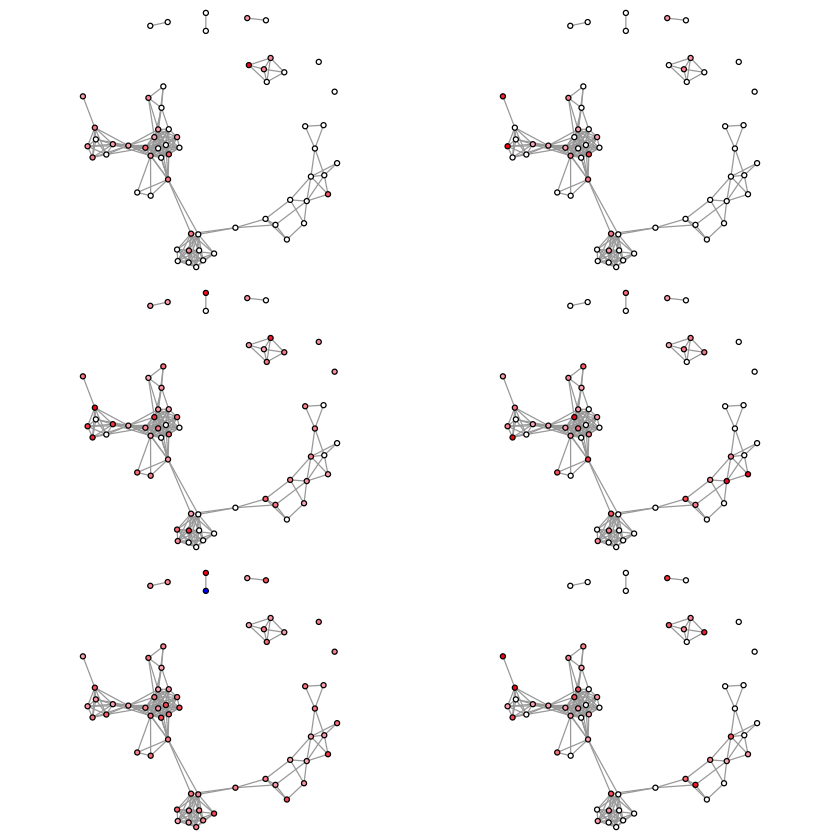

In [161]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(CC_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


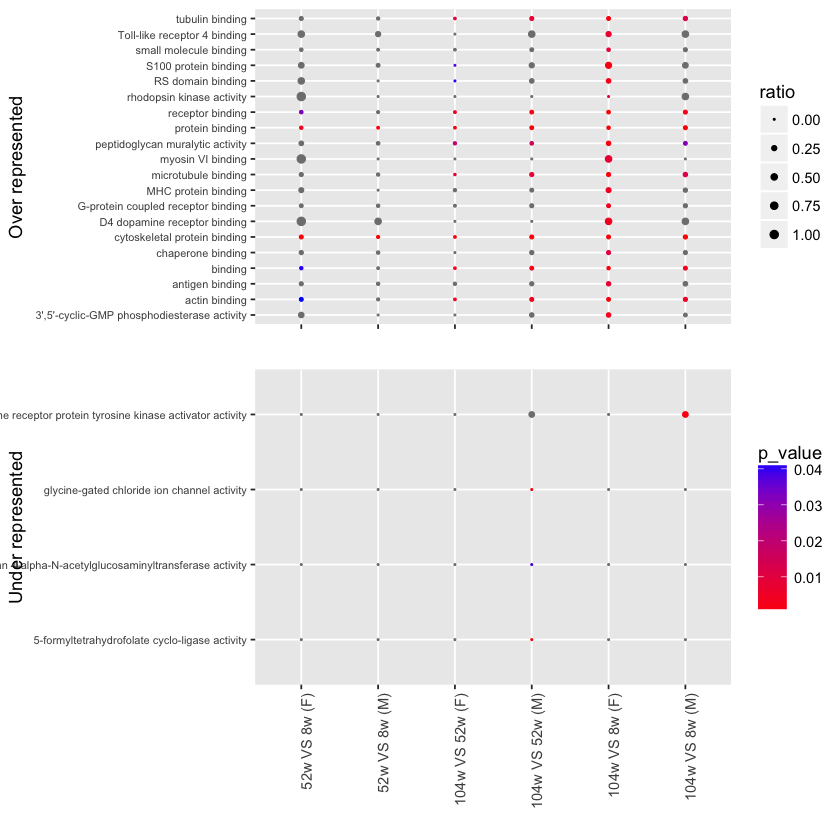

In [162]:
plot_top_go(age_gender_deg, "MF", 20)

In [163]:
MF_network = create_GO_network(age_gender_deg, "MF", MF_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

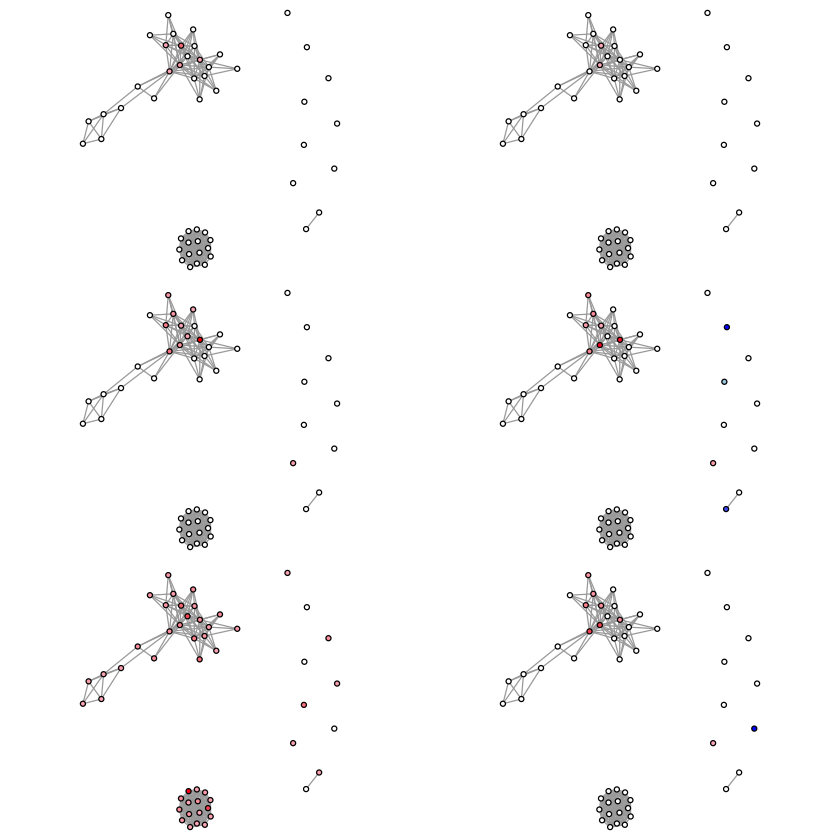

In [164]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(MF_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

# KEGG pathways

In [165]:
plot_kegg_pathways(age_gender_deg$over_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 12 rows, data has 28


In [ ]:
plot_kegg_pathways(age_gender_deg$under_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/under_repr_kegg/")

# Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

,Gene number
Set 1,729
Set 2,9


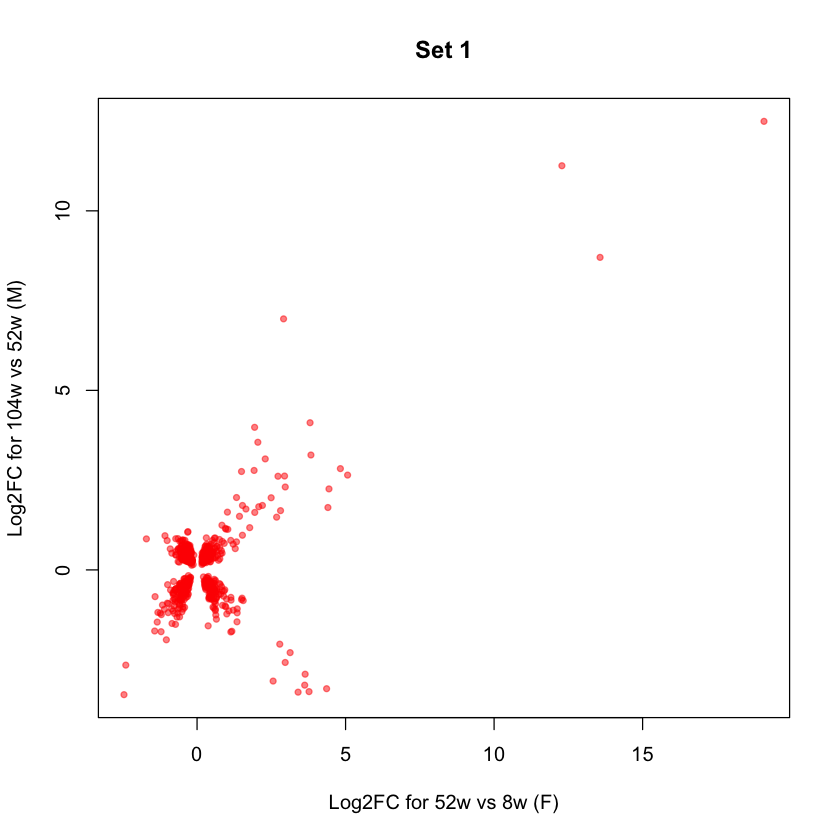

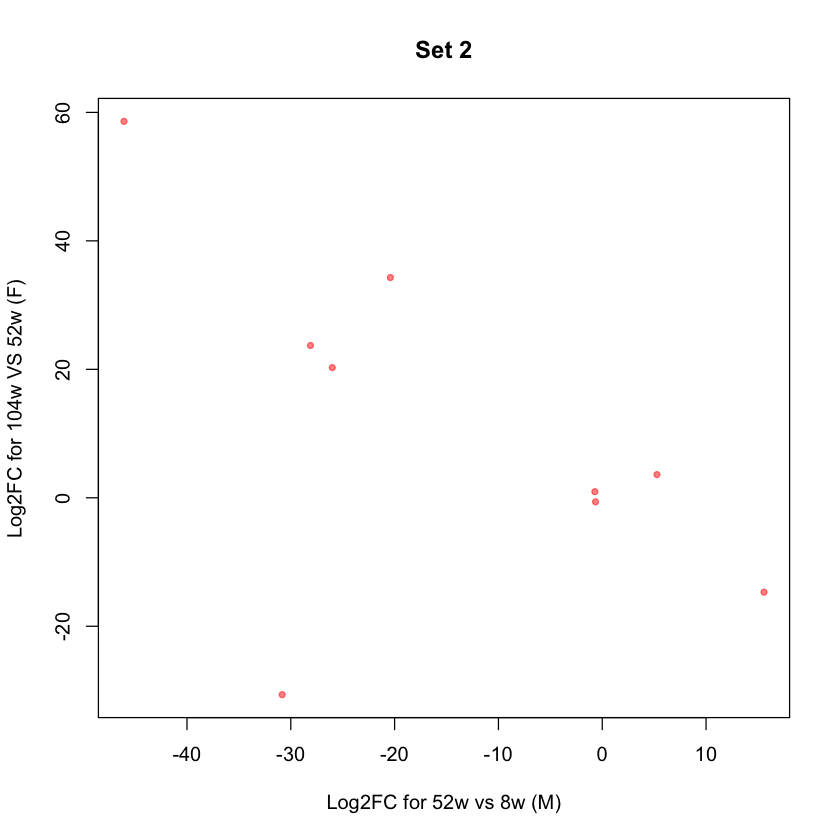

In [166]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,3]) & !is.na(age_gender_deg$fc_deg[,4]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,3]) & is.na(age_gender_deg$fc_deg[,4]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

## Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

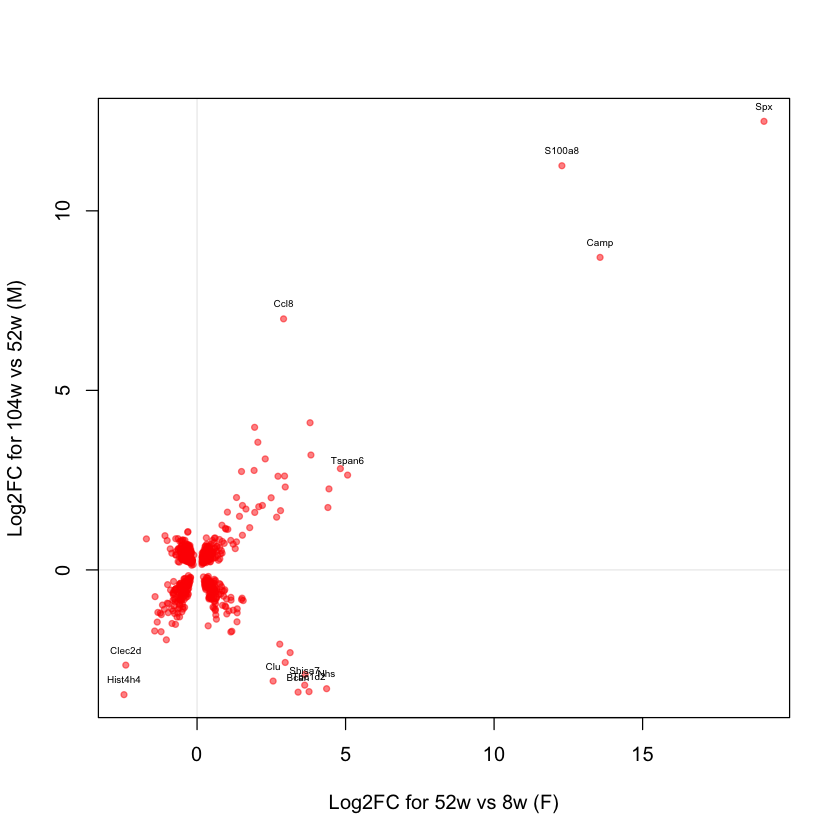

In [167]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

### 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0

In [168]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 186

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 34.483, df = 184, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9083259 0.9475915
sample estimates:
      cor 
0.9305874 



### 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0

In [169]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 136

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -26.39, df = 134, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9393075 -0.8836611
sample estimates:
       cor 
-0.9157734 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0

In [170]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 267

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -8.3658, df = 265, p-value = 3.45e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5471083 -0.3566042
sample estimates:
       cor 
-0.4570828 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0

In [171]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 140

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 16.17, df = 138, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7428457 0.8595714
sample estimates:
      cor 
0.8090422 



### Summary

![](../results/dge/age-effect/age_gender/male_delayed_genes.png)

Comp | 52w VS 8w (F) < 0 | 52w VS 8w (F) > 0
--- | --- | ---
104w VS 52w (M) > 0 | |
104w VS 52w (M) < 0 | |

[1] 117

[1] 29

[1] 64

[1] 17

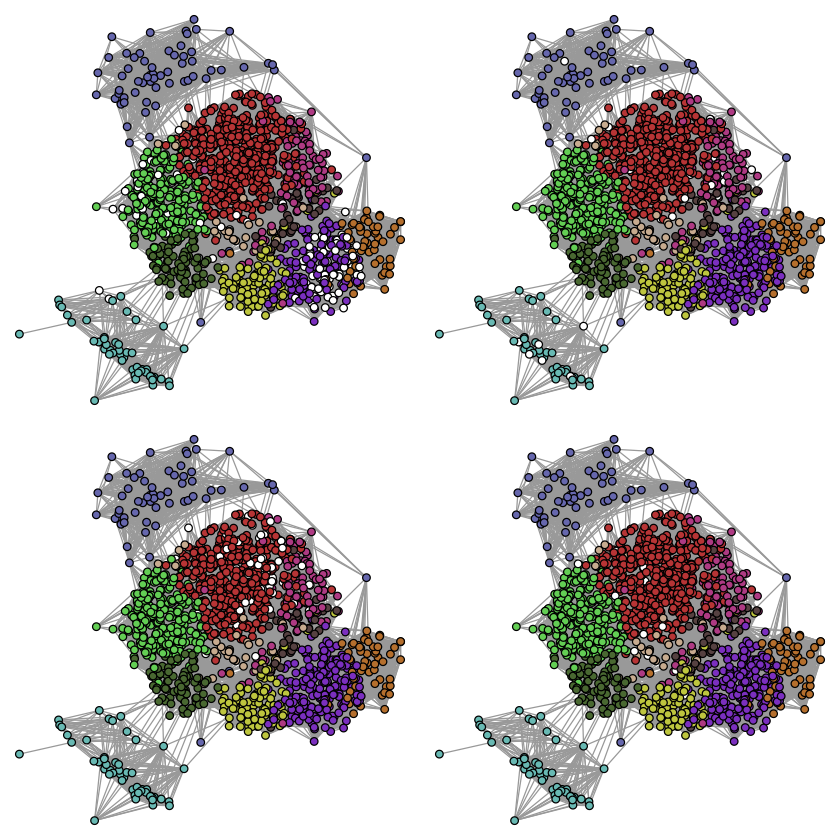

In [172]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1_col = connected_gene_colors
sum(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))
F_neg_M_pos_set_1_col[which(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1_col = connected_gene_colors
sum(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))
F_pos_M_pos_set_1_col[which(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1_col = connected_gene_colors
sum(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))
F_neg_M_neg_set_1_col[which(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_neg_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1_col = connected_gene_colors
sum(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))
F_pos_M_neg_set_1_col[which(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_neg_set_1_col, pal2, layout, add_legend = F)

## Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

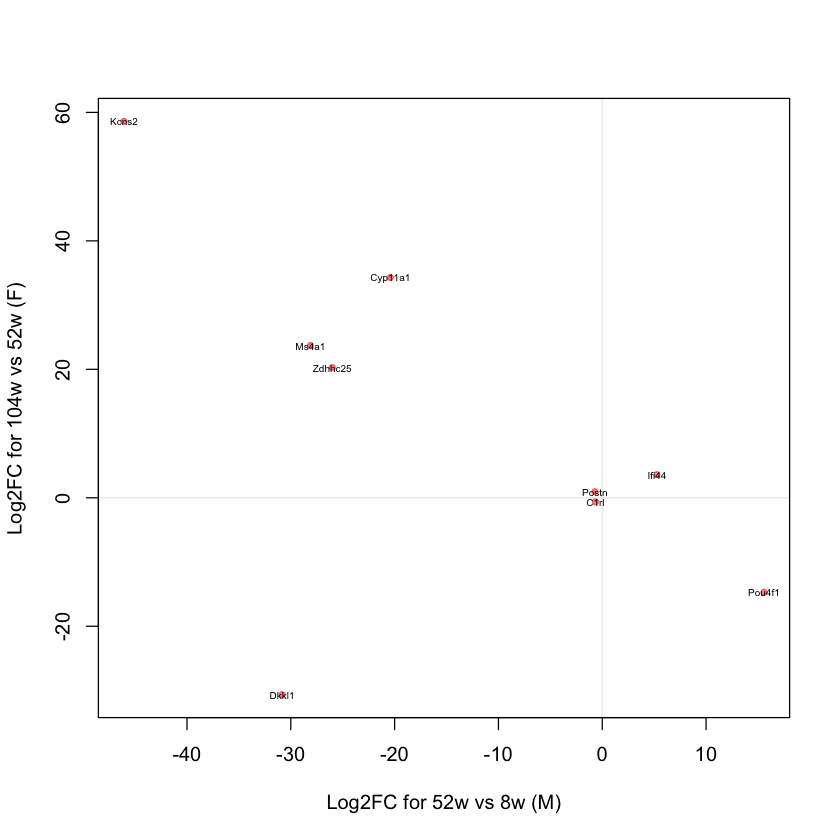

In [173]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

In [174]:
set_2_col = connected_gene_colors
sum(names(set_2_col) %in% rownames(aging_gender_diff))
#set_2_col[which(names(set_2_col) %in% rownames(aging_gender_diff))] = module_nb + 1
#plot_net_with_layout(net, set_2_col, pal2, layout)

[1] 0